In [6]:
%pip install numpy panadas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

class MyLinearRegression:
    def __init__(self, alpha=0.01, stopping_threshold=1e-7):
        self.alpha = alpha
        self.stopping_threshold = stopping_threshold
        self.w = None # We'll combine weights and bias here
        self.cost_history = []

    def fit(self, X, Y):
        # 1. Ensure X is 2D and Y is a column vector
        X = np.atleast_2d(X)
        Y = Y.reshape(-1, 1)
        
        # 2. Add intercept term (column of 1s) to X
        # This allows us to treat w0 and w1 as a single vector
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # 3. Initialize weights (including bias)
        self.w = np.random.randn(X_b.shape[1], 1) * 0.01
        
        previous_cost = float('inf')
        m = len(Y)

        while True:
            # Prediction
            y_hat = np.dot(X_b, self.w)
            
            # Cost (MSE)
            cost = (1 / (2 * m)) * np.sum(np.square(y_hat - Y))
            self.cost_history.append(cost)

            # Convergence Check
            if abs(previous_cost - cost) <= self.stopping_threshold:
                break
            
            previous_cost = cost
            
            # Gradient Update (The entire vector at once!)
            # Gradient formula: (1/m) * X^T * (Xw - y)
            gradients = (1 / m) * np.dot(X_b.T, (y_hat - Y))
            self.w -= self.alpha * gradients

        return self

    def predict(self, X):
        X = np.atleast_2d(X)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return np.dot(X_b, self.w)

In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("../assets//Student_Performance.csv")

# Select your features (X) and target (y)
features = ['Atten_Percent', 'Assig_Sc', 'Mid_Sc','Proj_Sc', 'Parti_Sc']
target = 'Overall_Sc'

X = df[features].values
y = df[target].values

In [12]:
# Simple Min-Max Scaling
X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Now train the model
model = MyLinearRegression(alpha=0.0001)
model.fit(X_scaled, y)

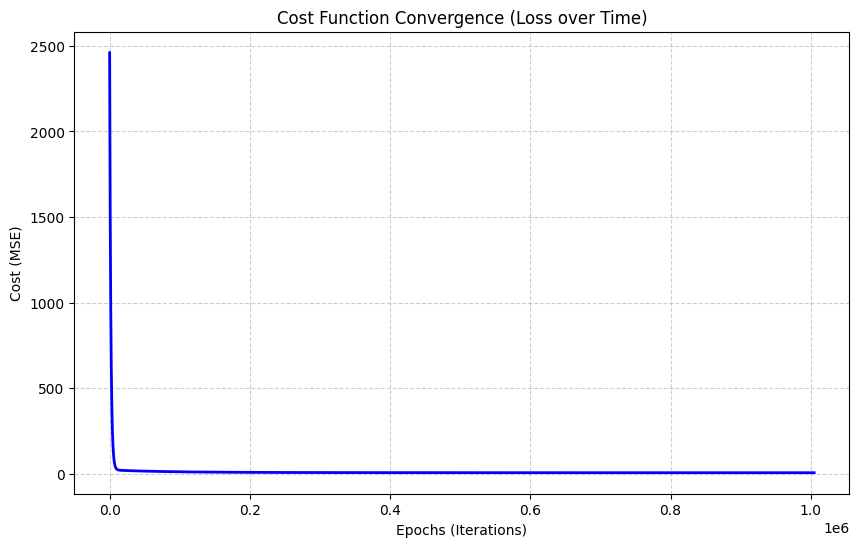

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(model.cost_history, color='blue', lw=2)
plt.title('Cost Function Convergence (Loss over Time)')
plt.xlabel('Epochs (Iterations)')
plt.ylabel('Cost (MSE)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [14]:
def predict_student_score(model, input_data, scaler_params=None):
    """
    model: Your trained MyLinearRegression instance
    input_data: A list or numpy array [Atten, Assig, Mid, Proj, Parti]
    scaler_params: Optional dictionary containing min/max values if you scaled your data
    """
    # Convert input to a 2D numpy array for the model
    X_input = np.array(input_data).reshape(1, -1)
    
    # IMPORTANT: If you scaled your training data, you MUST scale this input
    # using the exact same min/max values from the training set.
    if scaler_params:
        X_min = scaler_params['min']
        X_max = scaler_params['max']
        X_input = (X_input - X_min) / (X_max - X_min)
    
    prediction = model.predict(X_input)
    
    # Return the first element of the result
    return prediction[0] if isinstance(prediction, np.ndarray) else prediction

In [16]:
# During training setup
x_min = X.min(axis=0)
x_max = X.max(axis=0)
scaler_info = {'min': x_min, 'max': x_max}

In [20]:
new_student = [85, 60, 70, 72, 72]

estimated_score = predict_student_score(model, new_student, scaler_params=scaler_info)

print(f"Predicted Overall Score: {estimated_score[0]:.2f}")

Predicted Overall Score: 67.18
